### Scikit learn Copy of main data set

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
drive_link = r"https://drive.google.com/file/d/1Al8t5j84VkisJOLzckfnxDmEKK7muT6p/view?usp=sharing"
pd_link = 'https://drive.google.com/uc?id='+drive_link.split('/')[-2]
train = pd.read_csv(pd_link)
test  = pd.read_csv(pd_link)
print('Train data set : ', train.shape )
print('Test data set : ' , test.shape )

Train data set :  (1460, 81)
Test data set :  (1460, 81)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X_train = train.drop(columns = 'SalePrice')
y_train = train['SalePrice']
print('shape Matrix X_train Dataset',X_train.shape)
print('shape vector y_train Dataset',y_train.shape)    

shape Matrix X_train Dataset (1460, 80)
shape vector y_train Dataset (1460,)


In [13]:
# print(X_train)

In [14]:
X_train.select_dtypes(include = ['int64','float64'])  # 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [15]:
Num_var = X_train.select_dtypes(include = ['int64','float64']).columns
Num_var   # Selecting the columns which containing the only numerical value

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [16]:
X_train[Num_var].isnull().sum() # How many Null vaues are exist at place of numerical values

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### 1) creating the mean value

In [24]:
imputer_mean = SimpleImputer(strategy = 'mean')# formulation of mean value
imputer_mean.fit(X_train[Num_var])

SimpleImputer()

In [25]:
X_train[Num_var] = imputer_mean.transform(X_train[Num_var])
test[Num_var] = imputer_mean.transform(X_train[Num_var])

In [34]:
#      print('checking the missing value in the train dataset :  ' , X_train[Num_var].isnull().sum() )
#      print('checking the missing value in the test dataset :  ' , test[Num_var].isnull().sum() )


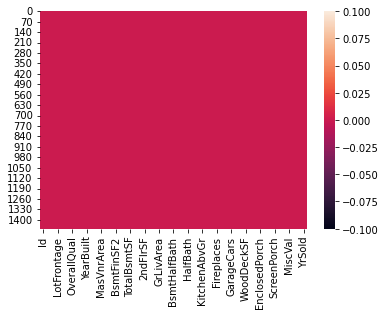

In [33]:
# heat map will show how many places NaN value is exist
sns.heatmap(X_train[Num_var].isnull())
plt.show()

### Filling the constant value at place of NaN

In [36]:

imputer_constant = SimpleImputer( strategy = 'constant',fill_value = 100)  # By default mean value will substitute at place of string or constant
imputer_constant.fit(X_train[Num_var])


SimpleImputer(fill_value=100, strategy='constant')

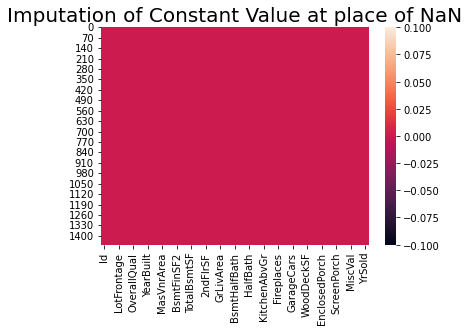

In [45]:
X_train[Num_var] = imputer_constant.transform(X_train[Num_var])
test[Num_var] = imputer_constant.transform(X_train[Num_var])
sns.heatmap(X_train[Num_var].isnull())
plt.title('Imputation of Constant Value at place of NaN',fontsize = 20)
plt.show()   # Dataset clear by using the 

### Imputation of Median value at place of NaN

In [38]:

imputer_median = SimpleImputer( strategy = 'median',fill_value = 100)  # By default mean value will substitute at place of string or constant
imputer_median.fit(X_train[Num_var])

SimpleImputer(fill_value=100, strategy='median')

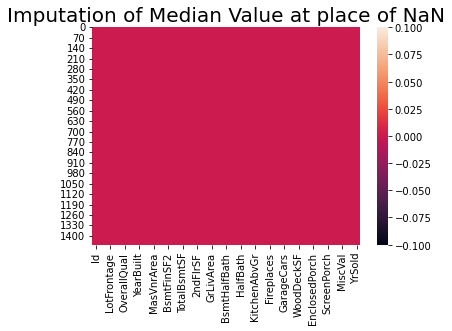

In [44]:
X_train[Num_var] = imputer_median.transform(X_train[Num_var])
test[Num_var] = imputer_median.transform(X_train[Num_var])
sns.heatmap(X_train[Num_var].isnull())

plt.title('Imputation of Median Value at place of NaN',fontsize = 20)
plt.show()   # Dataset clear by using the 

### Imputation of most frequenct Value in column at place of NaN

In [46]:
imputer_median = SimpleImputer( strategy = 'most_frequent')  # By default mean value will substitute at place of string or constant
imputer_median.fit(X_train[Num_var])

SimpleImputer(strategy='most_frequent')

In [ ]:
X_train[Num_var] = imputer_median.transform(X_train[Num_var])
test[Num_var] = imputer_median.transform(X_train[Num_var])
sns.heatmap(X_train[Num_var].isnull())

plt.title('Imputation of Median Value at place of NaN',fontsize = 20)
plt.show()   # Dataset clear by using the 

In [52]:
N = int(input())
arr = list(map(int,input().split()) )
arr[-1:]

4 
1 2 4 5


[5]